In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
def play_roulette(bet, win_probability=0.5):
    '''
    Place a bet and either gain an amount equal to that bet or lose it
    
    Args:
        bet: Number of dollars to bet
        win_probability: Probability that you will win
        
    Returns:
        winnings: plus or minus your bet.
    '''
    outcome = 1 if np.random.random()<win_probability else -1
    winnings = bet*outcome
    return winnings

In [198]:
play_roulette(5,0.5)

-5

Bet exceeds maximum bet.  You lose.


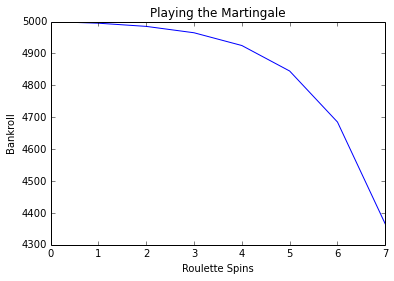

In [196]:
def play_martingale(bankroll, min_bet=5, max_bet=500, win_probability=0.5,verbose=True):
    bankroll_log = [bankroll]
    bet = min_bet
    winnings = 0
    while bankroll>=bet and bet<=max_bet and winnings <= 0:
        winnings = play_roulette(bet,win_probability)
        bankroll = bankroll + winnings
        bankroll_log.append(bankroll)
        bet = bet*2
        if verbose:
            if bet>max_bet:
                print "Bet exceeds maximum bet.  You lose."
            if bankroll<=bet:
                print "You ran out of money.  You lose."
            if winnings>0:
                print "Congratulations!  You won $%r!" %winnings
    return bankroll_log

plt.plot(play_martingale(5000,verbose=True, win_probability=0.1))
plt.xlabel('Roulette Spins')
plt.ylabel('Bankroll')
plt.title('Playing the Martingale')

In [319]:
def iterate_martingale(bankroll, target, min_bet=5, max_bet=500, win_probability=0.5, verbose = True):
    bankroll_log = [bankroll]
    bet = min_bet
    winnings = 0
    gain = 0
    while bankroll>=bet and bet<=max_bet and gain<target:
        winnings = play_roulette(bet,win_probability)
        bankroll = bankroll + winnings
        bankroll_log.append(bankroll)
        gain = bankroll_log[-1] - bankroll_log[0]
        if winnings<0:
            bet = bet*2
        else:
            bet = min_bet
        
        if bet>max_bet:
            outcome = "Bet exceeds maximum bet.  You lose."
        if bankroll<bet:
            outcome = "You're down to $%r, wich is not enough to make the required bet of $%r.  You lose." %(bankroll,bet)
        if gain >= target:
            outcome = "Congratulations!  You won $%r!" % gain
            reached_target = 1
        else: reached_target = 0
        
    if verbose:  
        print outcome
        plt.plot(bankroll_log)
        plt.xlabel('Roulette Spins')
        plt.ylabel('Bankroll')
        plt.title('Repeated Martingale, Goal=$%r' % target)
        
    return reached_target

In [321]:
iterate_martingale(500,1300,min_bet=5,max_bet=500,win_probability=18.0/38, verbose=False)

0

In [356]:
def simulate_martingales(bankroll, target, min_bet=5, max_bet=500, win_probability=0.5):
    wins = 0
    for i in range(1000):
        wins = wins + iterate_martingale(bankroll,target,min_bet,max_bet,win_probability, verbose=False)
    
    win_pct = wins*1.0/1000
    return win_pct

In [358]:
simulate_martingales(500,15,min_bet=5,max_bet=500,win_probability=18.0/38)

0.9371

In [359]:
def test_targets(target_list,bankroll, min_bet=5, max_bet=500, win_probability=0.5):
    win_pct_list = []
    for target in target_list:
        win_pct = simulate_martingales(bankroll, target, min_bet, max_bet, win_probability)
        win_pct_list.append(win_pct)
        
    return win_pct_list

target_list = [5,10,20,50,100,200,500,1000]
wins_100 = test_targets(target_list,100)
wins_500 = test_targets(target_list,500)
wins_1000 = test_targets(target_list,1000)
wins_2000 = test_targets(target_list,20000)

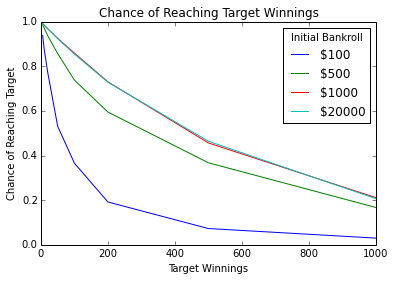

In [361]:
plt.plot(target_list,wins_100,label='$100')
plt.plot(target_list,wins_500,label='$500')
plt.plot(target_list,wins_1000,label='$1000')
plt.plot(target_list,wins_2000,label='$20000')
plt.xlabel('Target Winnings')
plt.ylabel('Chance of Reaching Target')
plt.title('Chance of Reaching Target Winnings ')
plt.legend(title='Initial Bankroll')